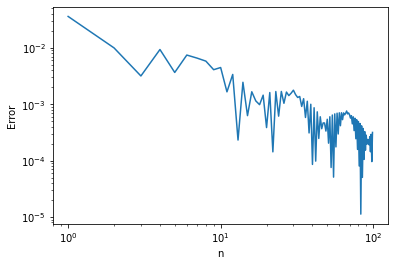

In [2]:
from pylab import *
import numpy 
from scipy.stats import norm


def binomial_tree(payoff, n, rp, sigma, S, K, T, array_out=False):
    #Initial parameters
    dt= T/n
    u= numpy.exp(sigma*numpy.sqrt(dt))
    d= 1/u
    p= (numpy.exp(rp*dt)-d)/(u-d)
    
    #price tree
    
    price_tree=numpy.zeros([n+1,n+1])
    
    for i in range (n+1):
        for j in range (i+1):
            price_tree[j,i]= S*(d**j)*(u**(i-j))
    #option value
    option= numpy.zeros([n+1, n+1])
    option[:,n] = numpy.maximum(numpy.zeros(n+1), price_tree[:,n]-K)
    
    #calculate option price at t=0
    for i in numpy.arange(n-1, -1, -1):
        for j in numpy.arange(0, i+1):
            option[j,i]= numpy.exp(-rp*dt)*(p*option[j,i+1]+(1-p)*option[j+1,i+1])
            
    if array_out:
        return [option[0,0], price_tree, option]
    else:
        return option[0,0]

def payoff(S, K):
    return np.maximum(0, S - K)
    

def black_scholes(S, K, sigma, rp, T):
    
    x= (log(S/K)+ (rp+ (sigma**2)/2)*T)/(sigma*numpy.sqrt(T))
    
    return S*norm.cdf(x) - K*numpy.exp(-rp*T)*norm.cdf(x-sigma*numpy.sqrt(T))

def error(n):
    return binomial_tree(payoff=payoff, n= n, rp=0.03, sigma=0.5, S=1, K=1.2, T=1)- \
    black_scholes(rp=0.03, sigma=0.5, S=1, K=1.2, T=1)


import matplotlib.pyplot as plt
figure()
arr = []
error_arr = []
for n in range(1,100, 1):
    arr += [n]
    error_arr += [abs(error(n))]
plt.loglog(arr,error_arr)
plt.xlabel('n')
plt.ylabel('Error')
show()

"""Discussion
    The plot shows that the logarithm of the error constantly decreases according to the increment of n. However, my 
    implementation causes an oscillation of errors, and the plot shows a repeated pattern of butterflies. This pattern
    can be used to accelerate the computing, i.e. with small n, as shown on th plot when n is around 100, the binomial
    tree method already gets pretty good result, and we thus don't need higher n steps, which saves much computing time.
    """